# **Simple Logistic Regression, Confusion Metrics and ROC_AUC Curve**


**Classification - Simple Logistic Regression.**

In [ ]:
# https://raw.githubusercontent.com/akmalatnamal/davlab8/main/IRIS.csv
# IRIS Dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab8/main/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The dataset used here is called the Iris dataset. This dataset has several features such as sepal length, sepal width based on which we predict which of the iris species that particular flower belongs to.


Read the IRIS.csv file into a pandas dataframe.

Assign the predictor and response variables. Remember the aim is to predict the iris species

Standardise the predictor variables using StandardScalar.

Split the dataset into train and validation sets, with 80% of the data for training

Fit a logistic regression model to the dataset

Compute and print the train and validation accuracy

Perform 10 fold cross-validation. Compute and print the accuracy.

In [ ]:
# Your code here
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
x = df.drop('species', axis = 1)
y = df['species']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# print(scaler.fit(x))
x = scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, train_size = 0.8, random_state = 41)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is : {acc}')

Accuracy of the model is : 0.9


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
x_pred = logreg.predict(x_train)
acc = accuracy_score(y_train, x_pred)
print(f'Accuracy of the model is : {acc}')

Accuracy of the model is : 0.975


In [ ]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  7],
       [12, 27]])

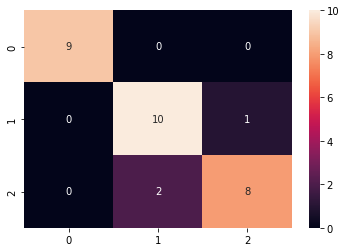

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

**Classification Accuracy, Confusion Metrics, Precision, Recall and ROC_AUC Curve.**

In [ ]:
# https://raw.githubusercontent.com/akmalatnamal/davlab9/main/heart.csv
# Heart Dataset with column name "target" as binary response variable which corrresponds if a person has a heart disease or not.
# All other variables are the predictors

In [ ]:
heart_df = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab9/main/heart.csv')

- Import the necessary libraries

- Read the data-file heart.csv as a pandas dataframe

- Select the 'target' column as the response variable and the rest as predictor variables

- Split the data into train and test set with a test_size=0.25 and random_state=56 

- Standardize your train and test data using Sklearns StandardScaler()

- Fit a logistic regression model on train data and generate predictions on the test data

- Use Sklearns confusion_matrix() to plot the confusion matrix and label it correctly

- Make a list of 6 C values ranging from 1e-30 to 1e5 and create a dictionary to store the validation accuracy for each C

- For each C value:

 - Use Sklearns KFold() to make splits of data

   - For every split, get the separate indices

   - Use these indices to get the cross-validation train and validation data

   - Fit a logistic regression model, predict on validation data and store the accuracy in a list

 - Store mean of all accuracies calculated across all folds of data into the dictionary created above with the key as its corresponding C value

- Compute the best C value by choosing the maximum of the dictionary

- Train the logisitic regression model with the best C value and generate predictions on the test data

- Calculate the confusion matrix and plot it

- Plot the ROC curve and calculate the area under the curve.

- Define a function to plot an ROC curve and calculate the area under the curve. 

- Inputs to the function should be: test labels, logprobs, auc score and axis.

- Use roc_curve() to calculate the false positive rate, true positive rate and thresholds

- Use roc_auc_score() to calculate the area under the curve 

- Use predict_proba() to calculate the log probabilities of the model

In [ ]:
x = heart_df.drop('target',axis = 1)
y = heart_df['target']

In [ ]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
scalar = StandardScaler()
x = scalar.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state = 56)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred_acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is:{y_pred_acc}')

Accuracy of the model is:0.75


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
x_pred = logreg.predict(x_train)
x_train_acc = accuracy_score(y_train,x_pred)
print(f'Accuracy of the model is:{x_train_acc}')

Accuracy of the model is:0.8722466960352423


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  7],
       [12, 27]])

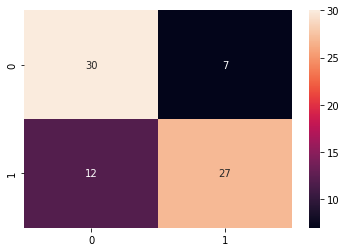

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
test_prob = logreg.predict_proba(x_test)
test_prob = pd.DataFrame(test_prob,columns = ['First', 'Second'])
test_prob

,First,Second
0,0.179647,0.820353
1,0.885839,0.114161
2,0.204482,0.795518
3,0.935472,0.064528
4,0.037508,0.962492
...,...,...
71,0.894311,0.105689
72,0.937773,0.062227
73,0.702674,0.297326
74,0.931203,0.068797


In [ ]:
test_prob['First'].mask(test_prob['First'] > 0.5 ,1, inplace=True)
test_prob['First'].mask(test_prob['First'] < 0.5 ,0, inplace=True)
test_prob['Second'].mask(test_prob['First'] > 0.5 ,1, inplace=True)
test_prob['Second'].mask(test_prob['First'] < 0.5 ,0, inplace=True)
(test_prob)

,First,Second
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
71,1.0,1.0
72,1.0,1.0
73,1.0,1.0
74,1.0,1.0


In [ ]:
true_predictors = test_prob['Second']
true_predictors

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
     ... 
71    1.0
72    1.0
73    1.0
74    1.0
75    0.0
Name: Second, Length: 76, dtype: float64

In [ ]:
y_test

81     1
168    0
137    1
242    0
2      1
      ..
181    0
186    0
213    0
158    1
293    0
Name: target, Length: 76, dtype: int64

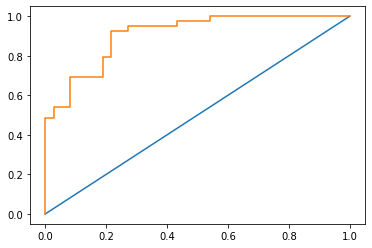

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

test_prob = logreg.predict_proba(x_test)[:,1]
fbr, tbr , thresh = roc_curve(y_test, test_prob)
plt.plot([0,1],[0,1])
roc_score = roc_auc_score(y_test, y_pred)
plt.plot(fbr,tbr,label=f'ROC_AUC Score{roc_score}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors =10)
knnc.fit(x_train, y_train)
y_pred = knnc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
print(acc, roc_score)

0.8026315789473685 0.8035343035343036


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 10)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
acc = accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
print(acc, roc_score)

0.6710526315789473 0.6718641718641718
